# 1. Hadoop

## 개요

* Google이 논문으로 발표한 GFS(Google File System)과 MapReduce를 구현한 결과물
* Hadoop은 분산파일 시스템인 HDFS(Hadoop Distributes File System)에 데이터를 저장하고, 분산처리 시스템인 맵리듀스를 이용하여 데이터를 처리

## Hadoop의 필요성

* 일상의 디지털화로 인해 데이터양은 폭증하였으며 그 종류는 매우 다양해짐
* 정형 데이터의 경우 기존의 관계형 데이터베이스(RDBMS)에 저장할 수 있지만, 웹 로그 같은 비정형 데이터를 RDBMS에 저장하기에는 데이터의 크기가 너무 큼<br>
-> 상용 RDBMS가 설치되는 장비는 대부분 고가, 고스펙이기에 데이터를 감당하고자 무작정 스토리지를 늘릴 수는 없음
* 반면 Hadoop은 비용측변에서 큰 이점을 지님
    - 오픈소스 프로젝트 -> 소프트웨어 라이센스 비용부담이 적음(상용 RDBMS는 라이센스 비용이 막대함)
    - 값비싼 유닉스 장비 없이도 x86 CPU의 리눅스 서버면 얼마든지 Hadoop을 설치해 운영 가능<br>
    -> 만약 스토리지가 더 필요한 경우 필요한 만큼 리눅스서버만 더 추가하면 됨

* 기존 RDBMS가 데이터를 저장된 서버에서 데이터를 처리하는 방식이라면, Hadoop은 데이터를 여러대의 서버에 저장하고, 데이터가 저장된 각 서버에서 동시에 데이터를 처리하는 방식
<br>
-> 이러한 분산 컴퓨팅은 기존 데이터 처리 방법보다 막대한 성능 향상을 가능하게 함

    * 스토리지 용량은 그간 엄청나게 증가했지만 I/O속도의 발전은 이에 미치지 못함
    * 따라서 단일 데스크에서 데이터를 읽어오는 것은 시간이 너무 많이 소요되며, 심지어 쓰는데는 더 오래 걸림
    * 여러 개의 디스크에서 동시에 데이터를 읽고 씀으로써 이러한 문제를 해결 가능
        <br>
        -> 하나의 디스크에서 2시간 동안 읽어올 파일을 100개의 디스크에서 병렬로 작업시 1~2분이면 가능
    * 또한 Hadoop은 데이터의 복사본을 저장하기 때문에 많은 하드웨어를 사용하면서 발생할 수 있는 데이터 유실, 장애 시에도 복구 가능

## Hadoop Ecosystem

* Hadoop은 비즈니스에 효율적으로 적용할 수 있도록 다양한 서브 프로젝트를 제공함<br>
-> 이러한 서브 프로젝트가 사용화되면서 Hadoop ecosystem(하둡 생태계)가 구성됨
* 분산 데이터를 저장하는 HDFS와 분산 데이터를 처리하는 MapReduce가 Hadoop코어 프로젝트이며 나머지는 서브 프로젝트
* Apache Hadoop 프로젝트에 속하는 프로젝트도 있지만, 업체에서 자사 솔루션으로 이용하다가 오픈소스로 공개한 프로젝트도 존재

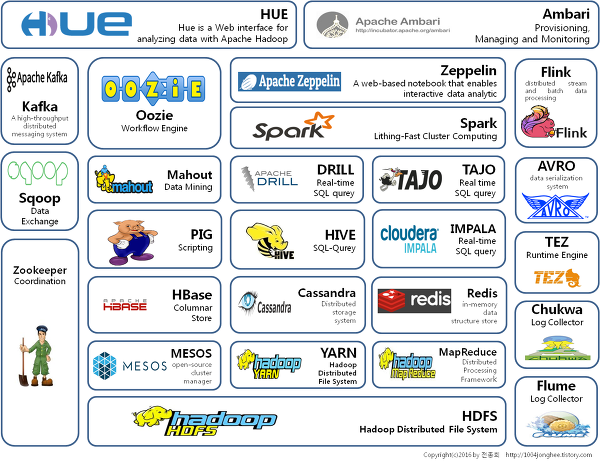

## 코디네이터

### Zookeeper
* 분산 환경에서 서버 간 상호 조정이 필요한 다양한 서비스를 제공하는 시스템
* 한 서버에만 서비스가 집중되지 않게 서비스를 알맞게 분산해 동시 처리할 수 있도록 지원
* 하나의 서버에서 처리한 결과를 다른 서버와도 동기화애 데이터의 안전성 보장
* 운영 서버에 문제가 발생해서 서비스를 제공할 수 없는 경우, 다른 대기중인 서버를 운영 서버로 변경하여 서비스가 중지없이 제공되게 함
* 분산 환경을 구성하는 서버의 환경설정을 통합적으로 관리

## 리소스 관리

### YARN
* 데이터 처리 작업을 실행하기 위한 지원(CPU, 메모리, 디스크 등) 스케줄링을 위한 클러스터 리소스 관리 시스템
* 기존 Hadoop MapReduce의 약점을 극복하기 위하여 시작된 프로젝트
* Hadoop 1.x에선 MapReduce가 Reduce 연산에 초점이 맞춰져 있으므로 이 두가지 형태 기반 계산에 특화되어 있어 이 외 다양한 유형의 데이터 처리에는 적합하지 않았음
<br>
-> 따라서 Hadoop 2.0부터 더 효율적으로 리소스를 관리하고 확장성 있는 YARN사용
* MapReduce, Hive, Impala, Tajo, Spark 등 다양한 애플리케이션들이 YARN으로부터 리소스를 할당받아 작업 수행

### Mesos
* 클라우드 인프라스트럭쳐 및 컴퓨팅 엔진의 다양한 자원을 통합적으로 관리할 수 있도록 만든 클러스터 리소스 관리 시스템
* YARN은 Hadoop echosystem 내 워크로드에 대한 리소스 관리에 특화되어 있는 반면, Mesos는 전체 데이터 센터의 리소스를 추상화하여 마치 하나의 대형 시스템처럼 작동시키게끔 설계됨
* 리눅스 컨테이너를 사용하요 클러스터링 환경에서 동적으로 자원을 할당하고 격리하는 메커니즘 제공
* 1만대 이상의 노드에도 대응 가능하며 웹 기반 UI, Java, C++, Python API 제공
* Spark, Storm, Elastic Search, Cassandra 등 다양한 애플리케이션을 Mesos 위에서 실행 가능

## 데이터 저장

### HBase
* HDFS 기반 분산 데이터베이스
* Googledml BigTable 논문을 기반으로 개발되었으며, 대용량 데이터를 빠르게 읽고 쓸 수 있음
* 주요 특징
    - **분산 처리**: HBase는 데이터를 Hadoop 파일 시스템인 HDFS에 저장함. HDFS는 데이터를 클러스터 전체에 분산시켜 저장하므로 HBase도 대용량 데이터를 분산처리 가능
    - **고가용성**: HBase는 자동으로 데이터의 복제본을 관리하여 장애 발생 시 복구 가능
    - **대용량 데이터 처리**: HBase는 테라바이트 이상의 대용향 데이터를 처리하는 데 유용

### Cassandra
* 고성능, 확장성, 고가용성을 제공하는 분산형 NoSQL 데이터베이스
* 대규모 데이터 처리를 위해 설계, 페타바이트 단위의 데이터를 처리할 수 있고 빠른 읽기 및 쓰기 연산을 지원
* 선형적인 확장성. 즉, 노드를 추가함에 따라 성능이 비례해서 증가. 이는 대규모 데이터 처리에 매우 유리
* Hadoop과 마찬가지로 master-worker아키텍쳐를 사용하는 HBase와 달리 masterless아키텍쳐를 사용하므로 master노드에 문제가 생겨도 시스템을 계속 작동 가능
* 컬럼 기반 데이터 모델을 지원하며, 이를 통해 유연하게 데이터를 저장하고 조회 가능
* SQL과 유사한 CQL(Cassandra Query Language)을 제공하여 사용자가 쉽게 데이터를 다룰 수 있게 함
* HBase가 대규모 데이터의 배치 처리나 시계열 데이터에 적합하다면, Cassandra는 실시간 데이터 처리나 높은 가용성이 요구되는 시스템에 적합함

### Kudu
* 컬럼 기반 스토리지로 실시간 빅데이터 분석에 최적화된 저장 시스템
* 기존에도 HDFS에 Parquet(피케이), RC, ORC와 같은 파일 포맷을 사용하면 컬럼 기반으로 데이터를 저장할 수 있었지만, HDFS 자체가 온라인 실시간 데이터 처리에 적합하지 않다는 약점 존재
* 따라서 HDFS 기반의 HBase또한 온라인 실시간 데이터 분석 처리가 느리다는 단점이 존재
<br>
-> 이를 극복하기 위하여 Kudu 개발
* 하지만, HDFS나 HBase처럼 기존에 널리 쓰이던 시스템을 완전히 대체하기보다는, 이들의 한계를 보완하는 형태로 주로 사용
* 예를 들어, 데이터를 빠르게 수정하거나 실시간으로 읽어야하는 작업에는 Kudu를, 대용량의 데이터를 장기간 안정적으로 저장하고 처리해야 하는 작업에는 HDFS를 사용
* Cloudera에서 개발

## 데이터 수집

### Flume
* 대량의 로그 데이터를 효율적으로 수집, 집계, 이동하는 것을 목표로 하는 분산형 서비스
* 다양한 소스로부터 데이터를 수집하고, 다양한 목적지(HDFS, HBase 등)로 전송
* 전체 데이터의 흐름을 관리하는 마스터 서버가 있어 데이터를 어디서 수집하고, 어떤 방식으로 전송하고, 어디에 저장하는지를 동적으로 변경 가능
* Cloudera에서 개발

### Scribe
* Facebook에서 개발한 데이터 수집 플랫폼
* 데이터를 중앙 집중 서버로 전송하는 방식
* 최종 데이터는 HDFS 외 다양한 저장소를 활용할 수 있음
* HDFS에 저장하려면 JNI(Java Native Interface)를 이용해야 함
* 설치와 구성이 쉽게 다양한 프로그래밍 언어 지원

### Sqoop
* 대용량 데이터 전송 솔루션
* HDFS, RDBMS, DW, NoSQL 등 다양한 저장소에 대용량 데이터를 신속하게 전송하는 방법 제공
* Oracle, MS-SQL, DB2 등과 같은 상용 RDBMS와 MySQL, PostgreSQL과 갗은 오픈소스 RDBMS 등을 지원

### Kafka
* 데이터 스트림을 실시간으로 관리하기 위한 분산 메세징 시스템
* Linkedln에서 자사의 대용량 이벤트 처리를 위하여 개발
* 발생(publish) - 구독(subscribe)모델로 구성
* 데이터 손실을 막기 위해 디스크에 데이터를 저장
* 파티셔닝을 지원하므로 다수의 Kafka 서버에서 메세지 분산처리가 가능
* 시스템 안정성을 위하여 로드밸런싱(파티셔닝을 통한 병렬연산으로 각 서버의 데이터와 부하를 고르게 분산) 보장
* 내고장성(Fault Tolerant, 복사본을 여러 서버에 저장함으로써 서버 장애가 발생해도 데이터 손실이나 서비스 중단 없이 지속적으로 서비스 제공) 보장
* 다수의 글로벌 기업들에서 Kafka 사용

## 데이터 처리

### Pig
* Yahoo에서 개발한 Hadoop에서의 데이터분석을 위한 플랫폼
* 대용량 데이터 집합에 대한 복잡한 데이터 처리 작업을 간소화하고, 빠르게 분석할 수 있는 도구
* 복잡한 MapReduce프로그래밍을 대체하는 Pig Latin(피그 라틴)이라는 자체 언어 제공
* MapReduce API를 매우 단순화하였으며 SQL과 유사한 형태
* 하지만 SQL과 유사하기만 할 뿐, 기존 SQL지식을 적용하기는 어려움

### Storm
* Twitter에서 개발한 실시간 분산 컴퓨팅 시스템
* 대용량 데이터 스트림을 신속하게 처리하고 분석할 수 있는 기능을 제공
* 복잡한 데이터 변환을 실시간으로 처리하는데 특히 유용
* 실시간 트윗 분석, 실시간 로그 분석, 실시간 ETL 등과 같은 고속 처리가 실시간 빅데이터 처리에 주로 사용

### Mahout
* Hadoop을 기반으로 대용량 데이터셋에 대한 머신러닝 알고리즘을 구현하기 위한 오픈소스 라이브러리
* 분류(classification), 회귀분석(regression), 군집 분석(clustering), 추천 및 협업 필터링(recommenders/collaborative filtering), 패턴 마이닝(pattern mining), 차원 축소(dimension reduction), 진화 알고리즘(evolutionary algorithms)등 주요 알고리즘 지원
* 그대로 사용할 수도 있지만, 각 비즈니스 환경에 맞게 최적화하여 사용

### Spark
* 인메모리 기반의 범용 데이터 처리 플랫폼
* 배치 처리, 머신러닝, SQL질의 처리, 스트리밍 데이터 처리, 그래프 라이브러리 처리와 같은 다양한 작업 수행 가능
* 가능 빠르게 성장하고 있는 오픈소스 프로젝트 중 하나

### Hive
* Facebook에서 개발한 Hadoop 기반 데이터웨어하우징 솔루션
* SQL과 매우 유사한 HiveQL이라는 쿼리 언어 제공
* HiveQL은 내부적으로 MapReduce job으로 변환되어 실행됨

### Impala
* Cloudera에서 개발한 Hadoop기반 분산 쿼리 엔진
* MapReduce를 사용하지 않고, C++로 개발한 인메모리 엔진을 사용해 빠른 성능 제공
* 데이터 조회를 위한 인터페이스로 HiveQL을 사용하며, 수초 내에 SQL질의 결과 확인 가능

### Presto
* Facebook에서 개발한 대화형 질의 처리 목적의 분산 쿼리 엔진
* 메모리 기반으로 데이터를 처리하며, 다양한 데이터 저장소에 저장된 데이터를 SQL로 처리 가능
* 특정 질의의 경우 Hive 대비 10배 정도 빠른 성능을 보임

# 2. Linux 기초

## 리눅스 디렉토리 구조

* 리눅스는 기본적으로 유닉스 계열의 운영체제이므로 유닉스와 유사한 디렉토리 구조 사용
* 유닉스는 시스템과 관련된 정보 및 장치들을 모두 파일로 관리 -> 리눅스도 마찬가지

## 리눅스 파일의 종류

### 일반파일
* 텍스트파일, 이미지 파일, 실행 파일 등 리눅스에서 일반적으로 사용되는 대부분의 파일

### 디렉토리
* 리눅스에서는 디렉토리도 파일로 취급
* 디렉토리 파일에는 해당 디렉토리에 저장된 파일이나 하위 디렉토리에 대한 정보가 저장됨

### 심폴릭 링크(Symbolic Link)
* 윈도우의 바로가기와 유사
* 원본 파일과 다른 파일명을 지정하여 원본 파일을 대신 사용

### 장치파일
* 리눅스에서는 HDD, 마우스 같은 장치들도 파일로 취급
* 장치 파일은 /dev 경로에 위치

## 디렉토리 구조

* 리눅스는 파일을 효율적으로 관리하기 위하여 계층구조의 디렉토리를 사용

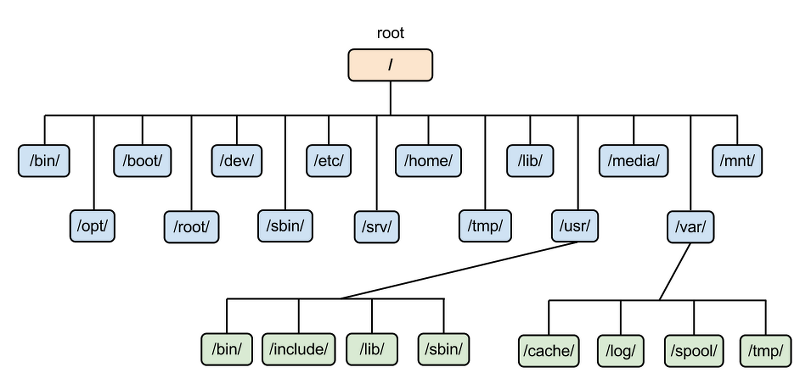

### 주요 리눅스 디렉토리

|마운트 포인트|설명|
|---|---|
|/|루트 파티션|
|/bin|리눅스의 기본 명령어가 들어있음|
|/sbin|시스템 관리용 명령어가 들어있음|
|/etc|시스템 환경설정과 관련된 파일이 들어있음|
|/boot|부팅 커널을 저장|
|/media|외부 장치를 마운트 하기 위하여 사용|
|/usr|응용프로그램들을 주로 저장|
|/lib|프로그램들의 라이브러리가 저장됨|
|/deb|장치 파일들이 저장됨|
|/home|사용자별 공간|
|/root|시스템 관리자인 root계정의 홈 디렉토리|
|/var|시스템 운영 중 발생한 로그, 캐시 파일들이 저장됨|
|/map|시스템 사용 중 발생한 임시 파일 저장(부팅 시 초기화)|

## 리눅스 명령어 기초

In [ ]:
# 모든 명령어는 --help를 통해 도움말을 확인 할 수 있다
shutdown --help

In [ ]:
# superuser권한으로 실행
# shutdown: 시스템 종료, 명령어 다음에 종료시간 설정가능
# -c: 시스템 종료 명령 취소
# now: 입력 즉시 명령어 실행
# -r: 재시작
sudo shutdown now

In [ ]:
# reboot: 시스템 재시작
# -p: poweroff, 시스템 종료
# -f: force, 시스템 강제 재부팅
sudo reboot

In [ ]:
# pwd: print Work Directory의 약자, 현재 사용자가 있는 디렉토리 출력
pwd

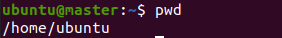

In [ ]:
# ls: list segments의 약자, 파일과 디렉토리의 모든 정보를 제공하며 특정 디렉토리와 특정 파일의 내용도 제공
# -a: 숨김파일을 포함하여 디렉토리에 존재하는 모든 파일 출력
# -l: 파일을 리스트 형식으로 풀력
ls -a

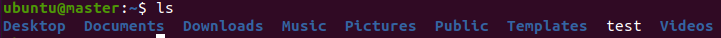

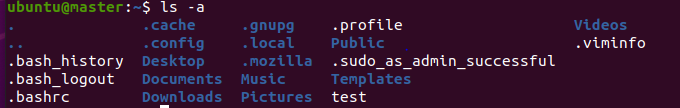

In [ ]:
# cd: 해당 디렉토리로 이동
cd Downloads

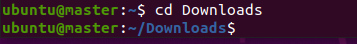

In [ ]:
# mkdir: 새 디렉토리 생성
mkdir test

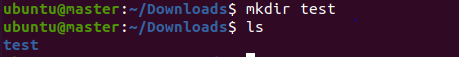

In [ ]:
# rmdir: remove directory, 빈 디렉토리 삭제하는 명령어
# 디렉토리가 비어있지 않은경우 삭제 불가능
rmdir test

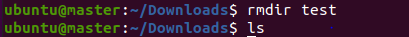

In [ ]:
# touch: 파일생성
touch apple

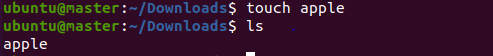

In [ ]:
# cp: 파일 복사
cp apple apple2

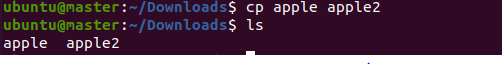

In [ ]:
# mv: 파일 이동
# 파일 이동 뿐만 아니라 mv를 사용하여 파일명 변경도 가능
mv apple2 apple3

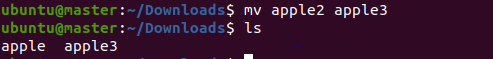

In [ ]:
# rm: 파일 및 디렉토리 삭제
# -R: recursive, 디렉토리 및 내용까지 모두 삭제(그냥 rm은 빈 디렉토리만 삭제 가능)
rm apple

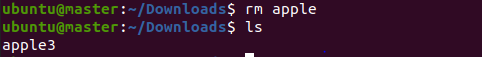

In [ ]:
# echo: 리눅스의 출력 명령어
echo test

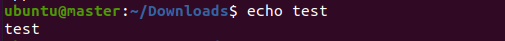

In [ ]:
# uname: OS의 이름, 버전 및 기타 시스템 특정 세부사항과 같은 시스템 정보를 얻기 위한 기본 Linux 명령어
uname -a

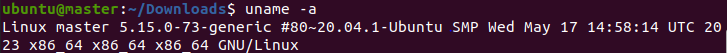

In [ ]:
# 패키지 설치
sudo apt install <package_name>

In [ ]:
# apt: Debian Linux의 패키지 관리자(MacOS의 brew와 유사)
# apt-get과 apt-cache 패키지의 결합

# 모든 package 목록 출력
apt list

# 설치된 package 목록 출력
apt list --installed

# 업그레이드 가능한 package목록 출력
apt lsit --upgradeable

In [ ]:
# update: package 목록 갱신
sudo apt update

In [ ]:
# upgrade: package를 최신 버전으로 업그레이드
sudo apt upgrade

In [ ]:
# install: package를 의존성과 함께 설치
# vim패키지를 설치
sudo apt install vim

In [ ]:
# remove: package 삭제
sudo apt remove <package_name>

In [ ]:
# wget, curl: url에서 파일 다운로드
wget <file_url>
curl <file_url>

In [ ]:
# vim: vi에서 기능이 보강된 텍스트 에디터
vim ~/.bashrc

In [ ]:
# vi를 사용하여 test라는 텍스트문서 생성 후 내용 작성
vi test
# shift + : 이후 아래의 명령어 입력

# i : 입력모드로 넘어감.
# w : 현재 파일명으로 파일 저장. (저장만 함 꺼지지는 않음) 
# w [파일명] : 입력한 파일명으로 파일 저장. (저장만 함 꺼지지는 않음)
# q : vi 종료 (저장되지 않음)
# q! : vi 강제 종료 ( ! 가 붙으면 강제로 수행)
# wq : 저장 후 종료 
# wq! : 강제 저장 후 종료 ( ! 가 붙으면 강제로 수행)

In [ ]:
# tar: tar파일 압축 해제
# -x: 압축해제
# -c: 압축파일 생성
# -v: 진행 메시지 출력
# -f: 파일 지정
tar -xf <압축을 풀고자 하는 파일 이름>

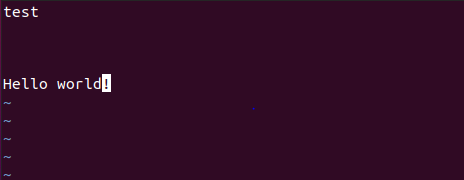

## 리눅스 권한 설정

In [ ]:
# ls -l: 파일이나 디렉토리의 소유권과 허가권 확인

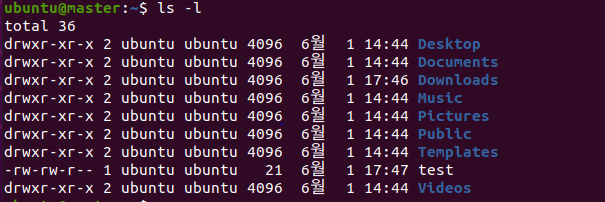

* 출력 결과는 다음과 같이 구성된다
    - drwxr-xr-x: 파일유형과 허가권(permission)
    - 2: 파일이나 디렉토리에 연결된 하드 링크(hard link)의 수

### 하드링크
* 파일의 데이터에 대한 참조
* ex) 두 개의 파일 이름이 같은 파일의 데이터를 가리키고 있을 때, 두 개의 파일 이름은 같은 파일에 대한 두 개의 하드 링크임
* 심볼릭 링크(소프트 링크)와 대비되는 개념으로, 원본 파일이 삭제되면 링크도 무효가 되는 심볼릭 링크와 달리 원본 파일이 삭제되도 하드 링크가 있는 한 데이터는 계속 유지됨
* ubuntu ubuntu: 소유권(ownership)을 나타내며, 파일 및 디렉토리의 소유자(owner)와 그룹(group)
* 4096: 파일크기, 바이트 단위 파일 크기
* 1월 9 00:32: 마지막으로 파일 및 디렉토리를 수정한 날짜와 시간
* Desktop: 파일 및 디렉토리 이름

### 1. 파일유형

|파일 유형|설명|
|---|---|
|-|일반 파일|
|d|디렉토리|
|l|심볼릭 링크|
|b|블록 디바이스|
|c|캐릭터 디바이스|

#### 블록 디바이스(Block Device)
* 데이터를 블록 또는 섹터 단위로 처리하는 디바이스
* HDD, DVD-ROM, 플래시 드라이브, ...

#### 캐릭터 디바이스(Character Device)
* 데이터를 문자(또는 바이트)단위로 처리하는 디바이스
* 키보드, 마우스, ...

### 2. 허가권
* 소유자 허가권, 그룹 허가권, 다른 사용자 허가권으로 구분되어 8진수 숫자 3개를 통해 표현

|허가권|설명|
|---|---|
|소유자 허가권|파일이나 디렉토리를 소유한 사용자의 허가권|
|그룹 허가권|파일/디렉토리를 소유한 그룹의 허가권(그룹에 속한 사용자에 대한 허가권)|
|다른 사용자 허가권|소유자나 그룹에 속하지 않는 사용자에 대한 허가권|


* 소유자, 그룹, 다른 사용자에게 읽기, 쓰기, 실행 권한을 부여 가능
|허가권|파일|디렉토리|
|---|---|---|
|읽기 권한(r)|파일의 내용을 확인하거나 복사가능|ls명령어 등으로 디렉토리 내의 파일과 디렉토리들을 확인 가능|
|쓰기 권한(w)|파일의 내용을 수정 가능|디렉토리가 포함하고 있는 파일 등을 수정 가능(즉, 파일을 생성/삭제 가능)|
|실행 권한(x)|실행 가능한 파일(ex. 셸 스크립트)의 경우 실행 가능|디렉토리 안으로 접근할 수 있는 권한. 실행 권한이 없다면 cd명령어로 디렉토리 내부에 들어감 수 없음|


* 허가권은 두가지 형태로 표현 가능
* 기호(symbolic)
    - 위의 사례와 같이 r, w, x를 사용하여 허가권 표현
    - rwxr-xr-x(rwx/r-x/r-x)의 경우
* 8진수 숫자(octal number)
    - 읽기(r)은 4, 쓰기(w)는 2, 실행(x)는 1로 표현
    - rwxr-xr-x(rwx/r-x/r-x)의 경우 755로 표현
    
    |소유자|소유 그룹|다른 사용자|
    |---|---|---|
    |rwx|r-x|r-x|
    |7|5|5|
    

In [ ]:
# useradd: 사용자 계정 생성
# -d: 홈 디렉토리(사용핳 디렉토리는 미리 생성되어 있어야 함)
# -m: 사용자 계정을 생성할 때, 홈 디렉토리가 없다면 /home/{USER}에 자동 생성
# -s: 해당 사용자 계정이 사용할 셀 선택(예제네서는 bash shell)
sudo useradd -m testuser -s /bin/bash

# 아래와 결과 동일
sudo mkdir /home/testuser
sudo useradd testuser -d /home/testuser -s /bin/bash

In [ ]:
# passwd: 사용자 계정의 비밀번호 설정
sudo passwd testuser

In [ ]:
# su: Switch user의 약자로 사용자 계정 변경
su ubuntu

In [ ]:
# userdel: 사용자 계정 삭제
# -r: 홈 디렉토리 및 사용자 계정과 관련된 메일도 모두 삭제
# -f: 사용자 계정과 연관된 프로세스가 있어도 강제로 삭제
userdel -r -f testuser

In [ ]:
# chown: 사용자 및 그룹 소유권 변경
# 사용자와 그룹을 모두 변경하고 싶다면 <user>:<group>의 형태로 사용
# 디렉토리의 경우 디렉토리 내 파일 및 디렉토리의 소유권 또한 모두 변경(재귀적 변경)하고 싶을 때는 R, --recursive옵션 사용
sudo chown ubuntu:ubuntu test_file
ls -l

In [ ]:
# chmod: 허가권 변경
# 750 = rwx/r-x/---
# 디렉토리의 경우 디렉토리 내 파일 및 디렉토리의 허가권 또한 모두 변경(재귀적 변경)하고 싶을 때는 -R, --recursive사용
chmod 750 test_file
ls -l